## 課題 卸売業者 教師なし学習

### 【課題】教師なし学習とは何か記述せよ

答え：　　

■教師あり学習との比較   
- 教師あり学習 - 人間が付けたラベル（説明変数）によって、教えられた構造を学び取る。入力データとその正解が与えられる。  
- 教師なし学習 - 与えられたデータ（特徴量）から規則性を発見して学び取る。入力データのみで正解は与えられない。

■どんなときに使うのか  
- 正解が与えられない問題や、与えられたデータの背後に存在する本質的な構造を抽出するために教師なし学習が用いられる。未知のデータの特徴を発見したり予測したりする場合に教師なし学習を使う場合が多い。

■具体的にどんなものがあるのか  
- クラスタリング  
階層型クラスタリング
非階層型クラスタリング(K-Means)

### 【課題】必要なライブラリをimport

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

### データ取得

In [2]:
data = pd.read_csv('Wholesale customers data.csv')

Attribute Information:

1)	FRESH: annual spending (m.u.) on fresh products (Continuous); 
2)	MILK: annual spending (m.u.) on milk products (Continuous); 
3)	GROCERY: annual spending (m.u.)on grocery products (Continuous); 
4)	FROZEN: annual spending (m.u.)on frozen products (Continuous) 
5)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
6)	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 
7)	CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal) 
8)	REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal) 
Descriptive Statistics: 

(Minimum, Maximum, Mean, Std. Deviation) 
FRESH (	3, 112151, 12000.30, 12647.329) 
MILK	(55, 73498, 5796.27, 7380.377) 
GROCERY	(3, 92780, 7951.28, 9503.163) 
FROZEN	(25, 60869, 3071.93, 4854.673) 
DETERGENTS_PAPER (3, 40827, 2881.49, 4767.854) 
DELICATESSEN (3, 47943, 1524.87, 2820.106) 

REGION	Frequency 
Lisbon	77 
Oporto	47 
Other Region	316 
Total	440 

CHANNEL	Frequency 
Horeca	298 
Retail	142 
Total	440  

Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717 

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11 



Citation Request:

The data set is originated from a larger database referred on: 

Abreu, N. (2011). Analise do perfil do cliente Recheio e desenvolvimento de um sistema promocional. Mestrado em Marketing, ISCTE-IUL, Lisbon 



属性情報：

1）フレッシュ：新鮮な製品の年間消費（m.u.）。
2）乳製品：乳製品の年間支出（m.u.）。
3）食料品：食料品（年間）に対する年間支出（m.u.）。
4）冷凍：凍結製品の年間支出（連続）
5）DETERGENTS_PAPER：洗剤および紙製品の年間支出（m.u.）（継続的）
6）デリカテッセン（Delicatessen）：デリカテッセン製品に対する年間支出（m.u.）。
7）チャネル：customersâ€™チャネル - Horeca（ホテル/レストラン/カフェ）またはリテールチャネル（名目）
8）地域：customersâ€™地域 - リスボン、ポルトガル、その他（名）
記述統計量：

（最小、最大、平均、標準偏差）
FRESH（3,112151,12000.30,12647.329）
ミルク（55,73498,5796.27,7380.377）
食料品（3,92780,7951.28,9503.163）
FROZEN（25,60869,3071.93,44854.673）
DETERGENTS_PAPER（3、40827、2881.49、4767.854）
デリカテッセン（DELICATESSEN）（3,47943,1524.87,2820.106）

地域の頻度
リスボン77
ポルト47
その他の地域316
合計440

チャネル周波数
ホレカ298
小売142
合計440  

関連論文：
Cardoso、Margarida G.M.S. （2013）。 論理弁別モデル - Luiz MoutinhoとKun-Huang Huarngによって編集されたマーケティングとマネジメントの定量モデリングにおける第8章。 World Scientific。 p。 223-253。 ISBN 978-9814407717
Jean-Patrick Baudry、Margarida Cardoso、Gilles Celeux、Maria Jos Amorim、Ana Sousa Ferreira（2012）が含まれます。 外部定性変数によるモデルベースのクラスタリングの選択を強化する。 研究報告書N°8124、2012年10月、プロジェクトチームSELECT。 INRIA Saclay - Žle-de-France、プロジェクション、Université©Paris-Sud 11
引用のリクエスト：
データセットは、参照されるより大きなデータベースから生成されます。
Abreu、N.（2011）。 アナリシスは、あなたの組織のプロモーションを再開するために必要です。 Mestrado em Marketing、ISCTE-IUL、リスボン

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
print("サンプルの数：{} 　特徴量の数：{}\n".format((*data.shape)))
print("各特徴量の型\n",data.dtypes,"\n")
print("統計量の要約")
display(data.describe())
display(data.head())

サンプルの数：440 　特徴量の数：8

各特徴量の型
 Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object 

統計量の要約


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
import seaborn as sns

### 可視化

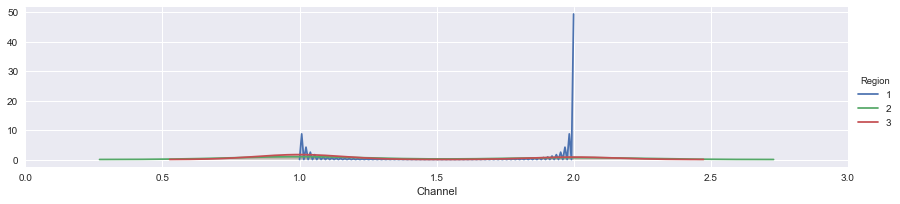

In [6]:
fig = sns.FacetGrid(data, hue="Region",aspect=4)
fig.map(sns.kdeplot,'Channel',shade= True)
z = data['Region'].max()
fig.set(xlim=(0,z))
fig.add_legend()

### 【課題】不要な特徴量を消す

Horeca = Hotel/Restaurant/Caféの総称  
Retail = 小売り

In [7]:
data_original = data.copy()

#dataからChannelとRegionの2列を削除するコードを記述
data = data.drop(['Channel','Region'],axis=1)

display(data.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### ※scatter matrixを描く

/Users/takahashikoji/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d8e89b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111aaf748>]], dtype=object)

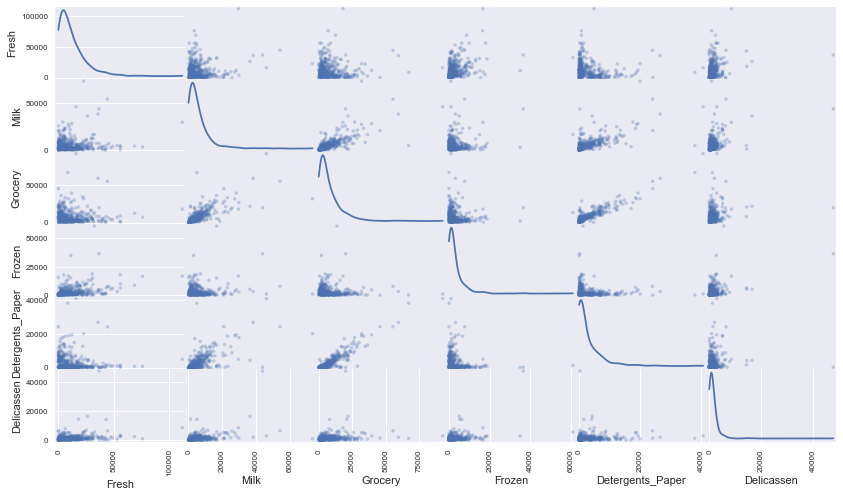

In [8]:
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

### 【課題】Feature Scalingの実行

In [9]:
data = np.log(data)
data_fs = pd.DataFrame(data)
data_fs

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
5,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008
6,9.403107,8.070594,8.850088,6.173786,8.051978,6.300786
7,8.933137,8.508354,9.151227,7.419980,8.108021,7.850104
8,8.693329,8.201934,8.731013,6.052089,7.447751,6.620073
9,8.700514,9.314070,9.845911,7.055313,8.912608,7.648740


### 【課題】なぜFeature Scalingが必要なのか記述せよ

答え： 単位（Scale）の違う特徴量、例えば身長と体重などを合計して比べようとしても単位が違うために正確に比べられない。そこでFeature Scalingを行い、各特徴量を同じ単位にスケーリングする。  
またFeature Scaling前後のFeature Scalingを見ても、Feature Scaling後の図ではデータの分布が正規分布に近くなっている(分散が大きくなった)ためにより正確な計算が可能になると思われる。

/Users/takahashikoji/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111fe9ba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112e3b438>]], dtype=object)

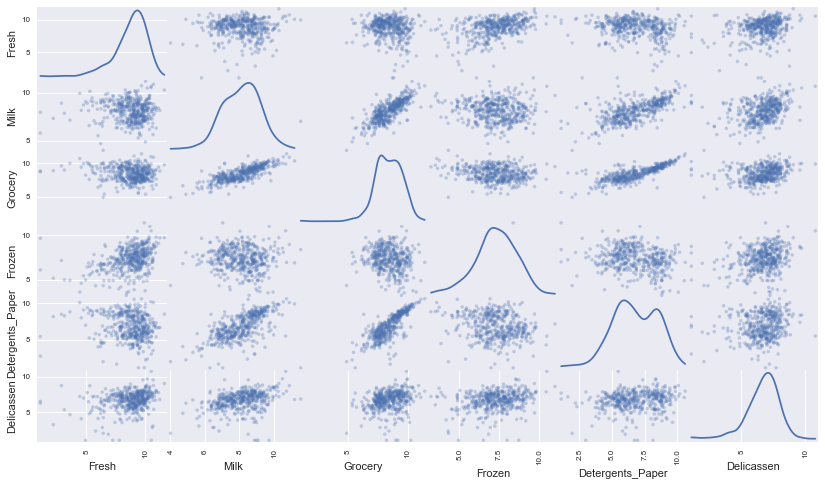

In [10]:
pd.scatter_matrix(data_fs, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

### 【課題】PCAの実行

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pd.DataFrame(pca.fit_transform(data_fs))
data_pca 

,0,1
0,-1.750985,-0.070515
1,-1.800365,-0.869754
2,-1.893736,-1.676621
3,1.127313,-1.457982
4,-0.796711,-2.460866
5,-1.083824,-0.392942
6,-1.132610,0.201602
7,-1.582474,-0.968196
8,-0.871825,0.596759
9,-2.888883,-0.741103


In [12]:
ev_ratio = pca.explained_variance_ratio_
ev_ratio

array([ 0.44237417,  0.27657107])

In [13]:
ev_sum = ev_ratio[0]+ev_ratio[1]
ev_sum

0.71894523173707281

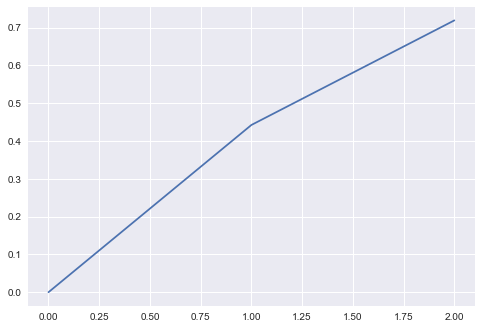

In [14]:
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0,ev_ratio.cumsum()])
plt.plot(ev_ratio)
plt.show()

### 【課題】なぜPCAを行うのか記述せよ

答え：PCAで相関関係にある特徴量同士を任意の数にまとめる事により、特徴量の個数を減らす事が出来る。それにより次元の呪い（過学習）対策や、計算量の削減に繋がるから。

### 【課題】クラスタリングとは

答え： 　
- いつ何に使うのか  
教師なし学習で、どういうグループに分割できるかがわからないときにひとまずクラスタリングしてみることによって、サンプルデータ全体を何となくクラスタ（集団）に分けられるよ。という手法。


- 階層的手法と非階層的手法との違い  
階層的手法とは、個体間の類似度あるいは非類似度（距離）に基づいて、最も似ている個体から順に集めてクラスターを作っていく方法である。  
非階層的手法とは、異なる性質のものが混ざり合った集団から互いに似た性質を持つものを集めクラスターを作る方法の１つである。階層的手法とは異なり階層的な構造ではなく、いくつのクラスタに分けるかは前もって分析者が決める必要がある。サンプル数が多いビッグデータを分析する時に適している。


- クラス分類（classification）との比較  
辞書で調べるとclassは「分野、類、部類、種類」と出てくる。対してclusterは「群れ、集団、一団」と出てくる。  
この直訳から解釈するに、クラス分類は対象（正解データ）になる分類を見つけるというニュアンス。クラスタリングはデータそれぞれを集団に分けるというニュアンス。  

クラス分類は事前に決まっている分類を新たに入力されたデータに正確に付与する手法。  
クラスタリングは、与えられたデータの中だけで集まりを見つける手法。似たものの集合を出力する。

### 【課題】樹状図を描く

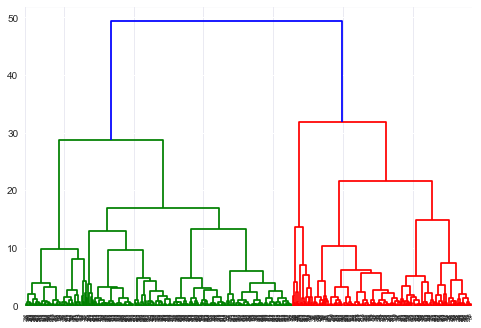

In [15]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
row_clusters = linkage(pdist(data_pca, metric='euclidean'), method='ward')
row_dender = dendrogram(row_clusters)
plt.show()

### 【課題】k-meansにおけるkの値の検討

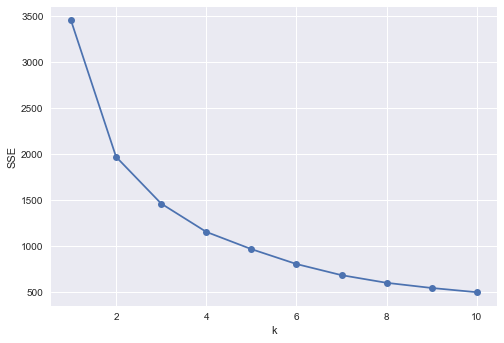

In [16]:
# エルボー法

from sklearn.cluster import KMeans

SSE = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(data_pca)
    SSE.append(km.inertia_)

plt.plot(range(1,11), SSE, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

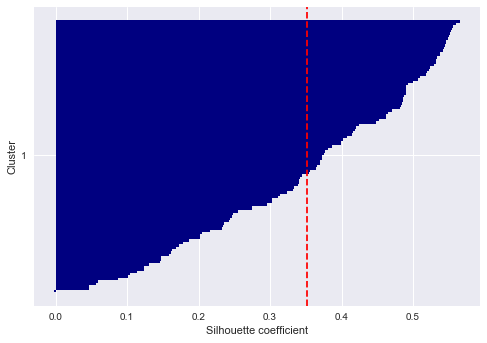

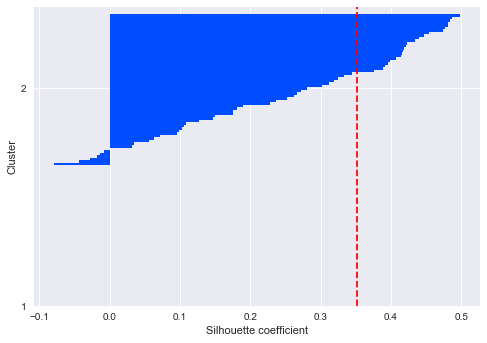

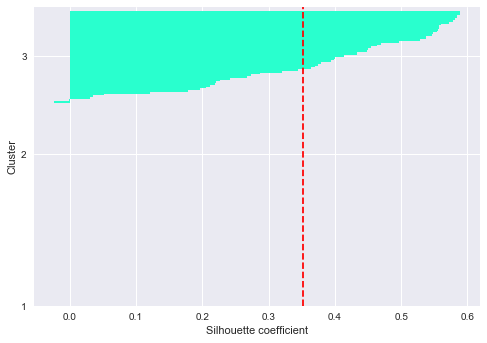

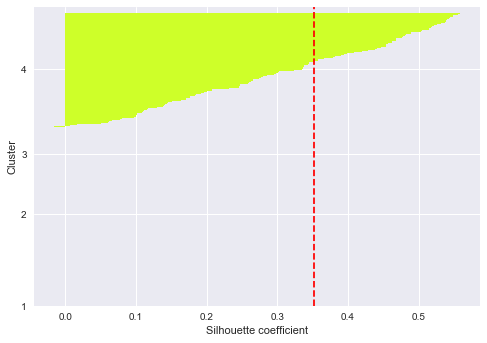

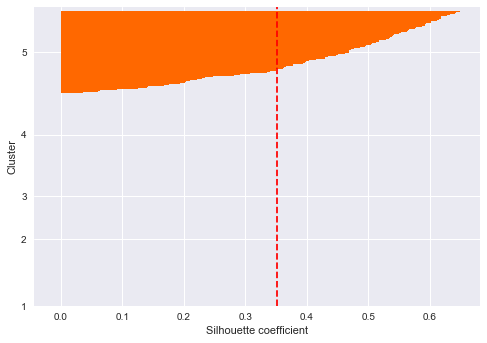

In [17]:
# シルエット分析

for i in range(2,6):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(data_pca)
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples
    import numpy as np
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data_pca, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()

k=3  
理由：クラスタ数を決める際の判断基準である「樹上図」、「エルボー法」、「シルエット分析」を行い、それぞれの結果(主に樹上図、エルボー法)からk=3にするのが良いと結論付けた。樹上図では縦軸30のところで切る事により３つに分けられる。エルボー法では３で急カーブしている為。

### 【課題】k-meansの実行

In [18]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(data_pca)

### 【課題】クラスタリングの可視化

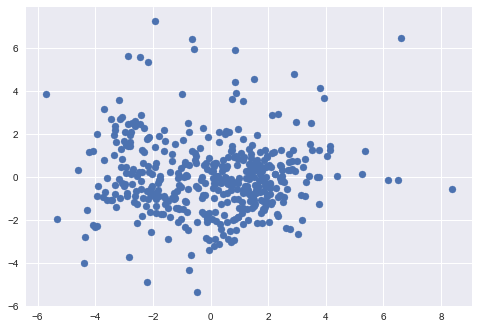

In [19]:
plt.scatter(data_pca[0],data_pca[1])

### 【課題】既知のグループとの比較

Channel(卸先)　 = 　ホレカ298 小売142  
Region(地域) =　  リスボン77 ポルト47 その他の地域316

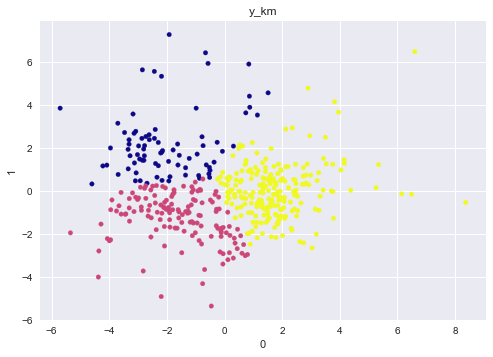

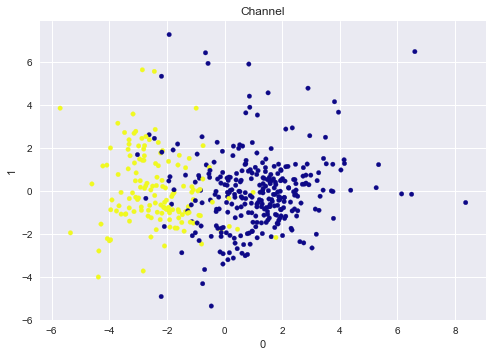

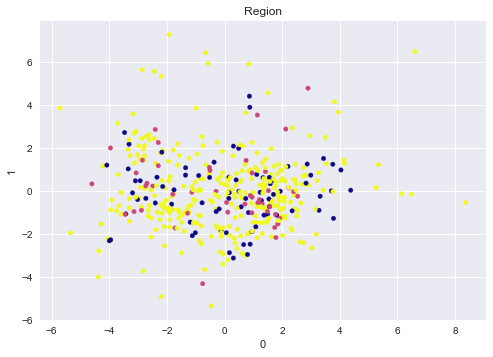

In [20]:
plt.figure()

plt.scatter(data_pca.iloc[:,0],data_pca.iloc[:,1],c=y_km ,marker='o', s=20,cmap='plasma')
plt.title('y_km')
plt.xlabel('0')
plt.ylabel('1')
plt.show()


plt.scatter(data_pca.iloc[:,0],data_pca.iloc[:,1],c=data_original['Channel'] ,marker='o', s=20,cmap='plasma')
plt.title('Channel')
plt.xlabel('0')
plt.ylabel('1')
plt.show()


plt.scatter(data_pca.iloc[:,0],data_pca.iloc[:,1],c=data_original['Region'] ,marker='o', s=20,cmap='plasma')
plt.title('Region')
plt.xlabel('0')
plt.ylabel('1')
plt.show()

答え：比較した結果、今回のクラスタリングで分けられたクラスタはRegionとFreshとの関係は薄いと思われる。

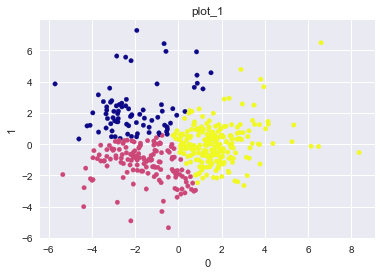

In [23]:
# X = data_pca.iloc[:,0] , y = data_pca.iloc[:,1]  c=y_km で分類されたクラスタ毎に色分けされる。

import matplotlib.pyplot as plt
% matplotlib inline

plt.scatter(data_pca.iloc[:,0],data_pca.iloc[:,1],c=y_km ,marker='o', s=20,cmap='plasma')
plt.title('plot_1')
plt.xlabel('0')
plt.ylabel('1')
plt.show()

In [22]:
data_original['y_km'] = y_km
data_original['total'] = data_original['Fresh'] + data_original['Milk'] + data_original['Grocery'] + data_original['Frozen'] + data_original['Detergents_Paper']
data_original = data_original.drop(['Channel','Region'],axis=1)
display(data_original.groupby('y_km').mean())
#display(data_original.groupby('y_km').median())
#display(data_original.groupby('y_km').max())
#display(data_original.groupby('y_km').min())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,total
y_km,,,,,,,
0,2401.07500,6947.887500,12775.462500,678.300000,5678.637500,818.712500,28481.362500
1,16957.56338,10585.992958,13393.901408,4063.161972,5173.683099,2816.415493,50174.302817
2,12293.90367,2253.738532,2635.738532,3304.665138,361.940367,942.729358,20849.986239


### 【課題】クラスタの説明

答え：上記の図は３つのクラスタ（集団）に分かれている。これはコンピュータが与えられたデータを、そのデータが持つ或る特徴を基にクラスタリング(データをクラスタに分ける事)したものである。  
コンピュータはデータを特徴ごとにクラスタリングしてはくれるが、データが持つどんな特徴によってクラスタリングしたかは教えてくれない。なのでコンピュータがクラスタリングした基準は、人間がその結果を基に推察する必要がある。   

※今回の結果（上記図　plot_1）を基にしたクラスタリング基準の推察は下記参照。  （y_kmの値=クラスタ毎に分けられた各特徴の平均の表も参照）

#### 赤色（図 y_km2）のクラスタ →　特徴０と１。年間消費量が共に低いクラスタ。  
#### 青色（図 y_km0）のクラスタ　→ 特徴０は少ないが特徴１の年間消費量が高いクラスタ。  
#### 黄色（図 y_km1）のクラスタ　→ 特徴１も比較的消費量が高く、特徴０の年間消費量が他クラスタに比べて圧倒的に高いクラスタ。 
  
    
と推察出来る。  なのでこのクラスタリングを基にChannel(卸先)やRegion(地域)以外の戦略、例えば赤色のクラスタでは全体的な消費を拡大するために何かこれまでにない新しい商品を導入する。青色では特徴０の消費を拡大するために商品の幅を広げるなどを展開すると良いのではないでしょうか？